<a href="https://colab.research.google.com/github/fadilalfitra/EDAProject/blob/main/Covid19_dataset_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation 
(iMPORT PACKAGE ETC)

In [19]:
#Import main package
import pandas as pd

In [20]:
# Check if link to Drive is OK
google = !if [ -d 'Drive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] is '0' ):
  from google.colab import drive
  drive.mount('/content/Drive/')
!if [ -d 'Drive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi\

/bin/bash: -c: line 2: syntax error: unexpected end of file


In [21]:
dataset = pd.read_csv('/content/Drive/My Drive/Colab Notebooks/Covid Live.csv', delimiter=',')
dataset.columns = ['Id','Country','TotalCases','TotalDeaths',
                   'NewDeaths','TotalRecovered', 'ActiveCases', 
                   'SeriousCritical','TotCases1Mpop', 'Deaths1Mpop',
                   'TotalTests','Tests1Mpop', 'Population']
dataset = dataset.set_index('Id')

In [22]:
dataset.head()

,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
Id,,,,,,,,,,,,
1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [23]:
dataset.dtypes

Country             object
TotalCases          object
TotalDeaths         object
NewDeaths          float64
TotalRecovered      object
ActiveCases         object
SeriousCritical     object
TotCases1Mpop       object
Deaths1Mpop         object
TotalTests          object
Tests1Mpop          object
Population          object
dtype: object

In [24]:
dataset.isnull().sum()

Country              0
TotalCases           0
TotalDeaths          5
NewDeaths          227
TotalRecovered      16
ActiveCases         15
SeriousCritical     83
TotCases1Mpop        2
Deaths1Mpop          7
TotalTests          16
Tests1Mpop          16
Population           2
dtype: int64

#Dataset explanation

## Column name list and brief description
1. Country             (object)
2. TotalCases          (object)
3. TotalDeaths         (object)
4. NewDeaths          (float64)
5. TotalRecovered      (object)
6. ActiveCases         (object)
7. SeriousCritical     (object)
8. TotCases1Mpop       (object)
9. Deaths1Mpop         (object)
10. TotalTests          (object)
11. Tests1Mpop          (object)
12. Population          (object)

## Dataset problems
The dataset contain variables that should be stored as float, but currently stored as object instead. It's because the value contain comma (,) as their separator. Other problem is that the data contain a lot of missing value.

# Data preparation (preprocess)
1. Remove comma and change data type into float
2. Handling null (missing values)

In [25]:
#get column with dtype is object
col_obj = dataset.select_dtypes(include = "object").columns
col_obj = col_obj[col_obj!='Country'] #Excluding country because we don't have to this column dtype

In [26]:
for col in col_obj:
  dataset[col] = dataset[col].str.replace(",","").astype(float)

In [27]:
import statistics as sts

col_float = dataset.select_dtypes(include = "float").columns
#Excluding NewDeaths
col_float = col_float[col_float!='NewDeaths']
#NewDeaths' missing value will be replaced with 0
#dataset['NewDeaths'].fillna(0, inplace=True)

#Every col_float except NewDeaths will get Missing Value replaced as mean or average
#for col in col_float:
#  dataset[col].fillna(sts.mean(dataset[col].dropna()), inplace=True)
dataset.dropna(subset=['TotalDeaths', 'TotalRecovered','TotalCases',
                       'SeriousCritical'])


,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
Id,,,,,,,,,,,,
1,USA,98166904.0,1084282.0,NaN,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
2,India,44587307.0,528629.0,NaN,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
3,France,35342950.0,155078.0,NaN,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
4,Brazil,34706757.0,686027.0,NaN,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
5,Germany,33312373.0,149948.0,NaN,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
212,Turks and Caicos,6380.0,36.0,NaN,6321.0,23.0,4.0,160539.0,906.0,5.500930e+05,13841952.0,3.974100e+04
214,Palau,5460.0,6.0,NaN,5444.0,10.0,1.0,299457.0,329.0,6.468100e+04,3547469.0,1.823300e+04
217,Anguilla,3865.0,12.0,NaN,3848.0,5.0,4.0,253775.0,788.0,5.138200e+04,3373736.0,1.523000e+04


### Add some  variables
I create some variable to make the analysis mor fascinating. Those variables are:
1. RecoveredPercentage : percentage of total recovered divided by total cases
2. DeathPercentage : Death ratio, percentage of total recovered divided by total cases
3. CriticalPercentage : Percentage of critical or serious cases dividedby total cases

In [28]:
#Create variable
dataset['RecoveredPercentage'] = dataset['TotalRecovered']*100/dataset['TotalCases']
dataset['DeathPercentage'] = dataset['TotalDeaths']*100/dataset['TotalCases']
dataset['CriticalPercentage'] = dataset['SeriousCritical']*100/dataset['TotalCases']

# Data Exploration (General)

I will do my Exploration Data Analysis (EDA) by using a heatmap that represent correlation matrix between variables. This will help us to see the common relation between variables.
Next EDA performed will be scatter plot. It will detail the heatmap by showing how one variable related to each other, with the first indication showed in heatmap.

## Heatmap

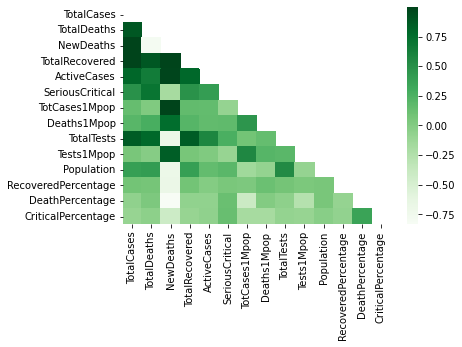

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#get the corr plot
corr = dataset.corr()
mask = np.triu(np.ones_like(corr))
heatmap = sns.heatmap(corr, cmap='Greens', mask=mask)

plt.show()

The heatmap shows us some strong pair of strong correlation, namely:
1. TotalDeaths x TotalCases
2. TotalRecovered x TotalCases
3. Total Recovered x TotalDeaths
4. TotalTest x TotalRecovered

Notice that variables that is Population Weighted (TotCases1Mpop, Deaths1Mpop,Test1Mpop) has a relatively smaller correlation than unweighted. However, most of the case, the weighted one is much more usefull because covid-19 is highly related with population density. 

We will try to talk more about this later.

## Scatter Plot
To investigate more about the relation between variables, we will use a scatter plot.

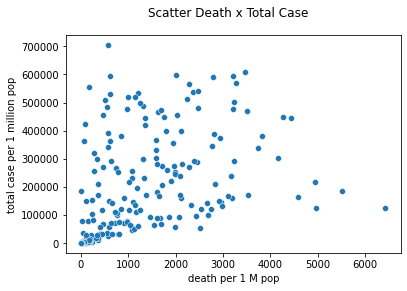

In [30]:
plt.ylabel('total case per 1 million pop')
plt.xlabel('death per 1 M pop')
plt.suptitle('Scatter Death x Total Case')
sns.scatterplot(x="Deaths1Mpop",y="TotCases1Mpop",data=dataset)

## Univariate Exploration

The classic question about covid-19 is "How deadly it is?", and to answer this we will use the "Recovered percentage" indicator or "Death percentage" indicator, without trying to link it each other. To answer this question, box plot is very useful graphic.


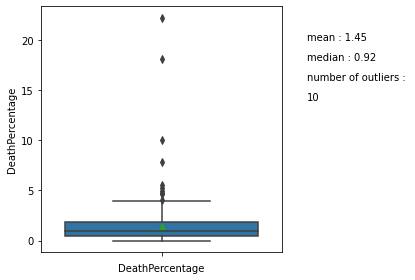

In [81]:
sns.boxplot(y=dataset['DeathPercentage'],
            showmeans=True)
q1 = dataset.quantile(0.25)['DeathPercentage']
q3 = dataset.quantile(0.75)['DeathPercentage']
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)

#for row in dataset.itertuples():
#   val = row.DeathPercentage
#   if val > outlier_top_lim or val < outlier_bottom_lim:
#       plt.text(x = 0.1, #text location
#                 y = val, #text location
#                 s =row.Country, #text to show
#                 ha='left', va='center')
plt.xlabel('DeathPercentage')
plt.text(x =0.6,
         y = 20,
         s ='mean : '+ str(dataset.DeathPercentage.mean().round(2)))
plt.text(x =0.6,
         y = 18,
         s ='median : '+ str(dataset.DeathPercentage.median().round(2)))
plt.text(x =0.6,
         y = 16,
         s ='number of outliers : ')
plt.text(x =0.6,
         y = 14,
         s =len(dataset[
                (dataset['DeathPercentage']>=outlier_top_lim) | 
                (dataset['DeathPercentage']<=outlier_bottom_lim)
                ])
         )
plt.tight_layout()
plt.show()

In [46]:
dataset.loc[dataset['DeathPercentage']>=outlier_top_lim, ['Country','DeathPercentage']]

,Country,DeathPercentage
Id,,
18,Mexico,4.658982
34,Peru,5.226516
89,Egypt,4.773245
96,Bosnia and Herzegovina,4.047478
145,Sudan,7.839140
149,Syria,5.520166
171,Somalia,4.968031
195,Yemen,18.072895
229,Western Sahara,10.000000


In [47]:
print('outlier limit is ', outlier_top_lim)

outlier limit is  3.978021282739607


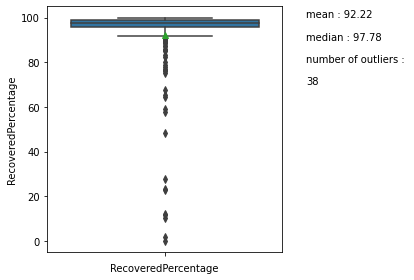

In [84]:
sns.boxplot(y=dataset['RecoveredPercentage'],
            showmeans=True)
q1 = dataset.quantile(0.25)['RecoveredPercentage']
q3 = dataset.quantile(0.75)['RecoveredPercentage']
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)

#for row in dataset.itertuples():
#   val = row.RecoveredPercentage
#   if val > outlier_top_lim or val < outlier_bottom_lim:
#       plt.text(x = 0.1, #text location
#                 y = val, #text location
#                 s =row.Country, #text to show
#                 ha='left', va='center')
plt.xlabel('RecoveredPercentage')
plt.text(x =0.6,
         y = 100,
         s ='mean : '+ str(dataset.RecoveredPercentage.mean().round(2)))
plt.text(x =0.6,
         y = 90,
         s ='median : '+ str(dataset.RecoveredPercentage.median().round(2)))
plt.text(x =0.6,
         y = 80,
         s ='number of outliers : ')
plt.text(x =0.6,
         y = 70,
         s =len(dataset[
                (dataset['RecoveredPercentage']>=outlier_top_lim) | 
                (dataset['RecoveredPercentage']<=outlier_bottom_lim)
                ])
         )
plt.tight_layout()
plt.show()

In [86]:
dataset.loc[dataset['RecoveredPercentage']<=outlier_bottom_lim, ['Country','RecoveredPercentage']]

,Country,RecoveredPercentage
Id,,
18,Mexico,89.688246
20,Taiwan,87.305181
22,Poland,84.836538
50,Hong Kong,83.414094
61,Lebanon,89.475702
67,Costa Rica,80.229808
85,Estonia,87.226622
86,Moldova,85.536523
89,Egypt,85.753183


In [87]:
print('outlier limit is ', outlier_bottom_lim)

outlier limit is  91.36264612754118
